In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
from sklearn.datasets import load_boston

In [21]:
load_boston().data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [22]:
boston =load_boston()

In [23]:
X=boston.data

In [24]:
Y=boston.target

In [25]:
X.shape,Y.shape

((506, 13), (506,))

In [26]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
mu = X.mean(axis =0)

In [42]:
sigma = X.std(axis= 0)

In [43]:
X = (X-mu)/sigma

In [44]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [45]:
def error(X, Y, theta):
    hx = hypothesis(X, theta)
    err = np.sum((hx - Y)**2)
    
    return err/X.shape[0]

In [46]:
def gradient(X,  Y, theta):
    hx= hypothesis(X, theta)
    diff = (hx - Y)
    return np.dot(X.T, diff)/X.shape[0]

In [47]:
def gradient_descent(X, Y, lr= 0.1, max_itr = 100):
    m, n = X.shape
    error_list = []
    theta = np.zeros((n,))
    
    for i in range(max_itr):
        e  = error(X , Y, theta)
        error_list.append(e)
        
        grad = gradient(X, Y, theta)
        theta = theta - lr*grad
        
    return theta, error_list

In [48]:
ones = np.ones((X.shape[0], 1))

In [49]:
X_ = np.hstack((ones, X))

In [50]:
start = time.time()
theta, error_list = gradient_descent(X_, Y)
end = time.time()
print("Total time is" , (end - start))

Total time is 0.03488802909851074


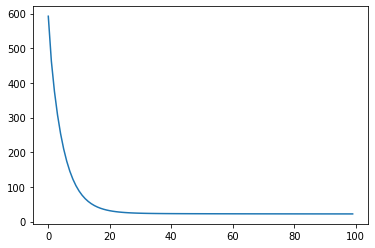

In [51]:
plt.plot(error_list)

In [52]:
theta

array([22.53220782, -0.78185418,  0.81390376, -0.27302486,  0.74237969,
       -1.58190647,  2.88681934, -0.10320657, -2.74824502,  1.4628725 ,
       -0.88418974, -1.95313341,  0.87190431, -3.64467529])

In [53]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
b = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

In [54]:
a.mean(axis=1)

array([2., 5., 8.])

In [57]:
np.dot(a.T,b).sum()/a.s

837